### Extraction of Documents or Forms Containing Both Printed and Handwritten Text Using OCR

#### Overview:
- Develop a system capable of extracting both printed (typed/computerised) and handwritten text from scanned documents or forms. The extracted data should be structured in a key value format to facilitate easier processing and analysis.
  
#### Objective:
- When a new document or form is uploaded, the system should accurately extract both handwritten and typed text, organising the output in a key value format (e.g., "Name: John Doe"). The technique must handle a variety of document formats and text styles while maintaining high accuracy.
  
#### Data:
- Scanned documents or forms containing both handwritten and typed text, which can include forms like surveys, invoices, applications, etc.You can consider the Open sources for data.
  
#### Requirements:
##### Input:
- Scanned or image based documents with a mixture of handwritten and typed text.
  
##### Output:
- Extracted content in a key value structure (e.g., "Name: John Doe", "Date of Birth: 01/01/1990").
- Export the extracted data to various formats like JSON, CSV, or XLSX.

# Import libraries

In [1]:
import os
import json
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Input and Output Directories

In [2]:
# Font path for detection text 
# (link --> https://huggingface.co/spaces/PaddlePaddle/PaddleOCR/blob/main/simfang.ttf) as download and save with local repo.
font_path=r'Input_Dir\Font_dir\simfang.ttf'

# Input the image file
input_file = r'Input_Dir\Extraction_Documents_or_Forms\sample_form_to_extract.png'

# Output Folder
output_folder = r'Output_Dir\Extraction_of_Documents_or_Forms'
os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist

# Use os.path.splitext to get the base name of the input file
base_name = os.path.splitext(os.path.basename(input_file))[0]

# Pre-processing 

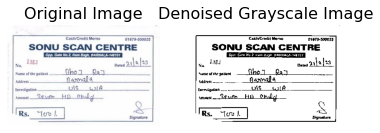

In [3]:
# Reading the image from the input file
image = cv2.imread(input_file)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to convert to binary
_, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Denoise the image
denoised_image = cv2.fastNlMeansDenoising(binary_image, None, 30, 7, 21)

# Plot the original and processed images side by side
plt.rcParams["figure.figsize"] = (30, 30)  # Adjust figure size as needed
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns for side-by-side comparison

# Show original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
axes[0].set_title('Original Image', fontsize=16 )
axes[0].axis('off')  # Hide axes for better visualization

# Show grayscale (or denoised) image
axes[1].imshow(denoised_image, cmap='gray')  # Display grayscale with gray colormap
axes[1].set_title('Denoised Grayscale Image', fontsize=16)
axes[1].axis('off')  # Hide axes for better visualization

plt.show()

# 1. Tesseract OCR

In [4]:
# Install TesseractOCR package
! pip install pytesseract

## Tesseract OCR Engine Modes (OEMs):
   
The --oem argument, or OCR Engine Mode, controls the type of algorithm used by Tesseract.

#### cmd --> $ tesseract --help-oem 


Tesseract 4 has two OCR engines — Legacy Tesseract engine and LSTM engine. There are four modes of operation chosen using the --oem option.
1. Legacy engine only   - 0
2. Neural nets LSTM engine only - 1
3. Legacy + LSTM engines - 2
4. Default, based on what is available -3

#### (Reference Links --> https://nanonets.com/blog/ocr-with-tesseract/)

## Tesseract Page Segmentation Modes (PSMs):

The --psm controls, the automatic page segmentation Mode used by Tesseract and to the improve your OCR Accuracy.
  
#### cmd -> $ tesseract --help-psm

Page segmentation modes of operation chosen using the --psm option.
1.  Orientation and script detection (OSD) only - 0
2.  Automatic page segmentation with OSD - 1
3.  Automatic page segmentation, but no OSD, or OCR. (not implemented) - 2
4.  Fully automatic page segmentation, but no OSD. (Default) - 3
5.  Assume a single column of text of variable sizes - 4
6.  Assume a single uniform block of vertically aligned text - 5
7.  Assume a single uniform block of text - 6
8.  Treat the image as a single text line - 7
9.  Treat the image as a single word - 8
10. Treat the image as a single word in a circle - 9
11. Treat the image as a single character - 10
12. Sparse text. Find as much text as possible in no particular order - 11
13. Sparse text with OSD - 12
14. Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific - 13

 #### (Reference Links --> https://pyimagesearch.com/2021/11/15/tesseract-page-segmentation-modes-psms-explained-how-to-improve-your-ocr-accuracy/)

In [5]:
# Import the tesseractOCR Library
import pytesseract

# Custom configuration for Tesseract
custom_config = r'--oem 3 --psm 11'  # Example: OEM 3 (default) and PSM 6 (Assume a single uniform block of text)
tesseract_extracted_text = pytesseract.image_to_string(input_file, config=custom_config)
print(tesseract_extracted_text)

Tamme Meme

O16To. so

SONU SCAN CENTRE

oa a

N

1363

wus 2112123.

ame tte patent —lno1_Qasy

Adie ——$-

Rela

ein NA

aneent Stuer HO Onde

Rs. “tov |.

&

Slonatre



In [6]:
# Save output for TesseractOCR
with open(os.path.join(output_folder, f'tesseract_output_{base_name}.json'), 'w') as json_file:
    json.dump({"TesseractOCR": tesseract_extracted_text.splitlines()}, json_file)

df = pd.DataFrame({"TesseractOCR": tesseract_extracted_text.splitlines()})
df.to_csv(os.path.join(output_folder, f'tesseract_output_{base_name}.csv'), index=False)
df.to_excel(os.path.join(output_folder, f'tesseract_output_{base_name}.xlsx'), index=False)

print("Outputs saved as JSON, CSV, and XLSX in the output folder.")

Outputs saved as JSON, CSV, and XLSX in the output folder.


# 2.Easy OCR

In [7]:
# Install EasyOCR Package
! pip install easyocr

In [8]:
# Import the EasyOCR Library
import easyocr

# Initialize the EasyOCR reader (supporting multiple languages if needed)
reader = easyocr.Reader(['en'], gpu=False) # need to run only once to load model into memory
result = reader.readtext(input_file, detail=0) # detail=0 returns text only
# Convert the extracted text into a format suitable for JSON
for item in result:
  print(str(item))

Using CPU. Note: This module is much faster with a GPU.
c:\Users\augus\anaconda3\envs\testocr\lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

cuin Crud  Aamo
04670-56aors
SONU SCAN CENTRE
Dna lkl
emtttertntattlton
1367
Wtu
2kb
Aln
Dhel
Pa J
emii
Rannald
Imeuratan
US
Llb
Amtlttn
Seufh
LD
Ehld
Rs
Tuv
Sionatur


In [9]:
# Save output for EasyOCR
with open(os.path.join(output_folder, f'easy_ocr_{base_name}.json'), 'w') as json_file:
    json.dump({"EasyOCR": result}, json_file)

df = pd.DataFrame({"EasyOCR": result})
df.to_csv(os.path.join(output_folder, f'easy_ocr_{base_name}.csv'), index=False)
df.to_excel(os.path.join(output_folder, f'easy_ocr_{base_name}.xlsx'), index=False)

print("Outputs saved as JSON, CSV, and XLSX in the output folder.")

Outputs saved as JSON, CSV, and XLSX in the output folder.


# 3. PaddleOCR

In [10]:
# Install PaddleOCR Package
! pip install paddlepaddle paddleocr

In [11]:
# Import the PaddleOCR Library
from paddleocr import PaddleOCR, draw_ocr

# Initialize PaddleOCR
ocr = PaddleOCR()  
result = ocr.ocr(input_file, cls=True)

# Prepare lists for draw_ocr
boxes = []
texts = []
scores = []
paddle_extracted_texts = []

# Process and print the results
for line in result:
    for word_info in line:
        text_value = word_info[1][0]  # Extract text
        score = word_info[1][1]  # Extract score
        paddle_extracted_texts.append({"text": text_value, "score": score})
        print(f"{text_value} : {score:.2f}")
        
        boxes.append(word_info[0])  # Collect boxes
        texts.append(text_value)      # Collect texts
        scores.append(score)          # Collect scores

[2024/09/25 17:55:54] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\augus/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\augus/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None,

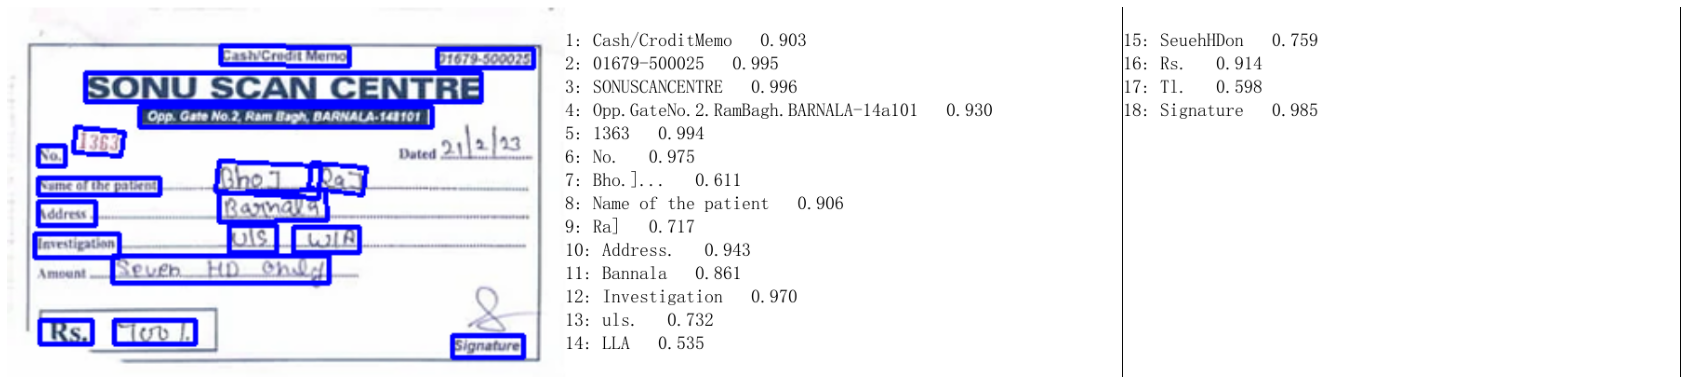

In [12]:
# Read the input image
image = cv2.imread(input_file)

# Draw OCR result on image
im_show = draw_ocr(image, boxes, texts, scores, font_path=font_path)

# Define the output file path
output_folder_name = os.path.splitext(os.path.basename(input_file))[0]
output_file_path = os.path.join(output_folder, f'{output_folder_name}_paddleOCR_result.jpg')

# Save the output image
cv2.imwrite(output_file_path, im_show)

# Display the result
img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
# Set the figure size (width, height) in inches
plt.figure(figsize=(30, 30))  # Adjust the size as needed
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [13]:
# Save output in JSON format
with open(os.path.join(output_folder, f'paddle_output_{base_name}.json'), 'w') as json_file:
    json.dump(paddle_extracted_texts, json_file, indent=4)  # Use 'text' instead of 'extracted_text'

# Save output in CSV and XLSX formats
df = pd.DataFrame(paddle_extracted_texts)  # Use 'text' instead of 'extracted_text'
df.to_csv(os.path.join(output_folder, f'paddle_output_{base_name}.csv'), index=False)
df.to_excel(os.path.join(output_folder, f'paddle_output_{base_name}.xlsx'), index=False)

print("Outputs saved as JSON, CSV, and XLSX in the output folder.")

Outputs saved as JSON, CSV, and XLSX in the output folder.
